In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [85]:
df=pd.read_csv("cities_r2.csv")
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [86]:
df.isna().sum()

,0
name_of_city,0
state_code,0
state_name,0
dist_code,0
population_total,0
population_male,0
population_female,0
0-6_population_total,0
0-6_population_male,0
0-6_population_female,0


In [87]:
df.dtypes

,0
name_of_city,object
state_code,int64
state_name,object
dist_code,int64
population_total,int64
population_male,int64
population_female,int64
0-6_population_total,int64
0-6_population_male,int64
0-6_population_female,int64


In [88]:
le=LabelEncoder()
for col in df.columns:
  if (df[col].dtypes=="O"):
    df[col]=le.fit_transform(df[col])

In [89]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,455,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,154,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,116,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,215,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,66,11902,7871,4031


In [90]:
X=df[["total_graduates"]]

In [91]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

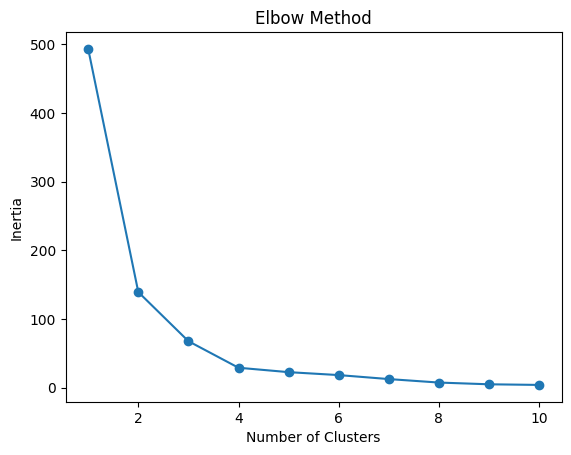

In [92]:
inertia = []
K = range(1,11)

for k in K:
  model=KMeans(n_clusters=k,random_state=42)
  model.fit(X_scaled)
  inertia.append(model.inertia_)

plt.plot(K,inertia,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [93]:
model=KMeans(n_clusters=4,random_state=42)
df["Cluster"]=model.fit_predict(X_scaled)

In [94]:
df[["total_graduates","Cluster"]]

,total_graduates,Cluster
0,16287,1
1,8863,1
2,10565,1
3,19225,1
4,11902,1
...,...,...
488,30656,1
489,109613,2
490,19363,1
491,29803,1


In [95]:
print("silhouette Score",silhouette_score(X_scaled,model.labels_))

silhouette Score 0.8100936515398268


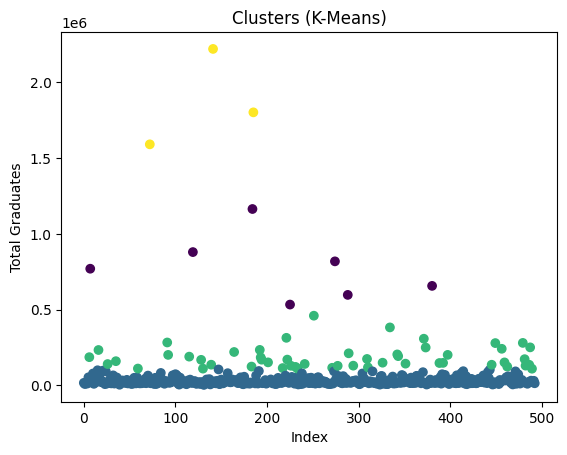

In [96]:
plt.scatter(df.index, df['total_graduates'], c=df['Cluster'])
plt.xlabel("Index")
plt.ylabel("Total Graduates")
plt.title("Clusters (K-Means)")
plt.show()